In [58]:
import pandas as pd
df = pd.read_json('dataset.json')
df.drop(columns=['Turn'],inplace=True)
df.head()

,State,Action
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0
1,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",4
2,"[1, 0, 0, 0, -1, 0, 0, 0, 0]",1
3,"[1, 1, 0, 0, -1, 0, 0, 0, 0]",2
4,"[1, 1, -1, 0, -1, 0, 0, 0, 0]",6


In [59]:
df.shape

(4265, 2)

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['State'], df['Action'], test_size = 0.15)

x_train = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_train)))
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_test = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_test)))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [61]:
OUT_DIM = len(df['Action'].unique())+1
INPUT_SHAPE = x_train[0].shape

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = INPUT_SHAPE),
    tf.keras.layers.Bidirectional(LSTM(27)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUT_DIM, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 54)                7992      
_________________________________________________________________
dropout_7 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                550       
Total params: 8,542
Trainable params: 8,542
Non-trainable params: 0
_________________________________________________________________


In [64]:
filepath = "weights.best.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x_train, y_train, 
                    epochs=300, 
                    validation_data=(x_test, y_test), 
                    verbose=1,
                    callbacks=[es_callback, cp_callback])
model.load_weights(filepath)

Epoch 1/300
109/114 [===========================>..] - ETA: 0s - loss: 2.2831 - accuracy: 0.1485
Epoch 00001: val_accuracy improved from -inf to 0.16406, saving model to weights.best.hdf5
114/114 [==============================] - 1s 13ms/step - loss: 2.2819 - accuracy: 0.1501 - val_loss: 2.2585 - val_accuracy: 0.1641
Epoch 2/300
107/114 [===========================>..] - ETA: 0s - loss: 2.2358 - accuracy: 0.1922
Epoch 00002: val_accuracy improved from 0.16406 to 0.23438, saving model to weights.best.hdf5
114/114 [==============================] - 0s 4ms/step - loss: 2.2334 - accuracy: 0.1956 - val_loss: 2.2111 - val_accuracy: 0.2344
Epoch 3/300
113/114 [============================>.] - ETA: 0s - loss: 2.1777 - accuracy: 0.2262
Epoch 00003: val_accuracy improved from 0.23438 to 0.25000, saving model to weights.best.hdf5
114/114 [==============================] - 1s 5ms/step - loss: 2.1777 - accuracy: 0.2262 - val_loss: 2.1606 - val_accuracy: 0.2500
Epoch 4/300
102/114 [===============

105/114 [==========================>...] - ETA: 0s - loss: 1.2407 - accuracy: 0.5810
Epoch 00027: val_accuracy improved from 0.65156 to 0.65469, saving model to weights.best.hdf5
114/114 [==============================] - 0s 4ms/step - loss: 1.2379 - accuracy: 0.5821 - val_loss: 1.0894 - val_accuracy: 0.6547
Epoch 28/300
106/114 [==========================>...] - ETA: 0s - loss: 1.2205 - accuracy: 0.5955
Epoch 00028: val_accuracy improved from 0.65469 to 0.65938, saving model to weights.best.hdf5
114/114 [==============================] - 1s 5ms/step - loss: 1.2227 - accuracy: 0.5956 - val_loss: 1.0738 - val_accuracy: 0.6594
Epoch 29/300
112/114 [============================>.] - ETA: 0s - loss: 1.2170 - accuracy: 0.5776
Epoch 00029: val_accuracy did not improve from 0.65938
114/114 [==============================] - 1s 6ms/step - loss: 1.2160 - accuracy: 0.5782 - val_loss: 1.0618 - val_accuracy: 0.6578
Epoch 30/300
104/114 [==========================>...] - ETA: 0s - loss: 1.1979 - ac

Epoch 55/300
110/114 [===========================>..] - ETA: 0s - loss: 1.0409 - accuracy: 0.6372
Epoch 00055: val_accuracy did not improve from 0.69375
114/114 [==============================] - 1s 5ms/step - loss: 1.0410 - accuracy: 0.6367 - val_loss: 0.8756 - val_accuracy: 0.6906
Epoch 56/300
114/114 [==============================] - ETA: 0s - loss: 1.0168 - accuracy: 0.6469
Epoch 00056: val_accuracy did not improve from 0.69375
114/114 [==============================] - 1s 5ms/step - loss: 1.0168 - accuracy: 0.6469 - val_loss: 0.8712 - val_accuracy: 0.6891
Epoch 57/300
112/114 [============================>.] - ETA: 0s - loss: 1.0155 - accuracy: 0.6468
Epoch 00057: val_accuracy did not improve from 0.69375
114/114 [==============================] - 1s 6ms/step - loss: 1.0142 - accuracy: 0.6466 - val_loss: 0.8639 - val_accuracy: 0.6906
Epoch 58/300
112/114 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.6395
Epoch 00058: val_accuracy did not improve from 0.6

104/114 [==========================>...] - ETA: 0s - loss: 0.9617 - accuracy: 0.6638
Epoch 00083: val_accuracy did not improve from 0.70469
114/114 [==============================] - 1s 6ms/step - loss: 0.9642 - accuracy: 0.6634 - val_loss: 0.8129 - val_accuracy: 0.7016
Epoch 84/300
112/114 [============================>.] - ETA: 0s - loss: 0.9668 - accuracy: 0.6509
Epoch 00084: val_accuracy did not improve from 0.70469
114/114 [==============================] - 0s 4ms/step - loss: 0.9669 - accuracy: 0.6508 - val_loss: 0.8129 - val_accuracy: 0.7000
Epoch 85/300
104/114 [==========================>...] - ETA: 0s - loss: 0.9634 - accuracy: 0.6587
Epoch 00085: val_accuracy did not improve from 0.70469
114/114 [==============================] - 1s 5ms/step - loss: 0.9606 - accuracy: 0.6607 - val_loss: 0.8107 - val_accuracy: 0.6984
Epoch 86/300
107/114 [===========================>..] - ETA: 0s - loss: 0.9705 - accuracy: 0.6580
Epoch 00086: val_accuracy did not improve from 0.70469
114/114 

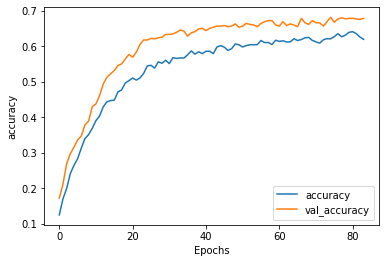

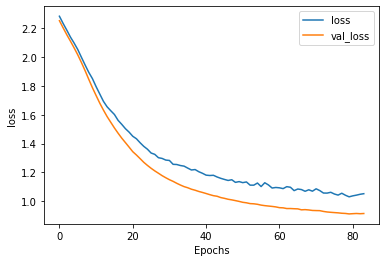

In [57]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [36]:
input_state = [[-1, 1, -1, -1, 0, 0, 1, -1, 1]]

inp = np.asarray(input_state).astype(np.float32)
inp = inp.reshape(((inp.shape[0], 1, inp.shape[1])))
prediction = model.predict(inp)
#print(prediction)

print(np.argmax(prediction))

5


In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb+') as f:
  f.write(tflite_model)